# **Deep Learning Final Project**

**Mohamad Ali GHADDAR**

**Juste BANKUMUKUNWI**

**Ali ABDALLAH**

# **Face Emotion Recognition**










Face emotion recognition involves the identification and analysis of human emotions from facial expressions using deep learning techniques.

Emotion detection has numerous applications including human-computer interaction, market research, and mental health monitoring.

# **Objective**

**FER : CNN VS MOBILENETV2**

Our objective is to implement a program capable of predicting emotions based on images, with the help of deep learning models.

We will first implement CNN then MobileNetV2 on the sae dataset and then compare the results of both models.

# **Dataset used**
We have utilized the [FER 2013](https://www.kaggle.com/datasets/msambare/fer2013) dataset provided on Kaggle.<br>
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.<br>

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

### **Let's Begin:**

# **Data Exploration:**

**Lets start by importing the required libraries.**

In [ ]:
# Basic python libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get rid of warnings!
import warnings
warnings.filterwarnings('ignore')

# Deep learning libraries.
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,MaxPooling2D,Flatten,Conv2D,BatchNormalization,Activation,InputLayer,Lambda
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix
import itertools

print('Above libraries have been imported.')

Above libraries have been imported.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/archive.zip'

In [ ]:
from zipfile import ZipFile
with ZipFile(file_path , 'r') as ZipFile:
  ZipFile.extractall()
  print('Zip file extracted successfully')

Zip file extracted successfully


**Seperate the Training and Validation Data.**

In [ ]:
# Define the train and validataion data paths.
train_dir = '/content/train'
val_dir = '/content/test'

**Have a look at our data.**

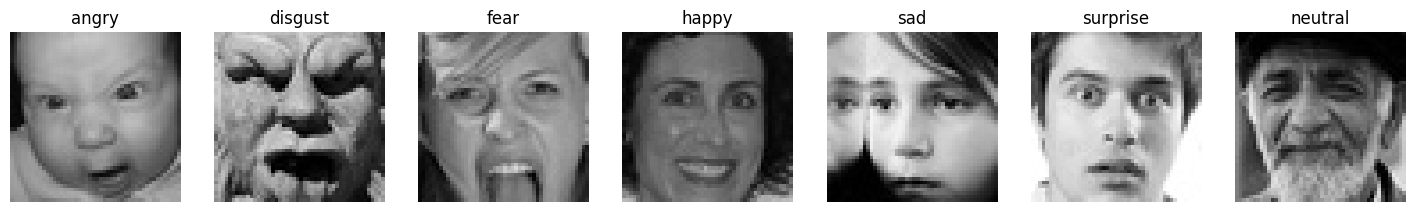

In [ ]:
# Define the default image size.
img_size = 48

# Define the seven emotions provided in dataset.
emotion_list = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Plot the images with each distinct emotions.
plt.figure(figsize=(18,22))
i = 1
for expression in emotion_list:
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[59]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

**Perform some Data Augmentation on train and validations sets.**

# **Data Preprocessing:**

In [ ]:
# Rescale the data.
'''
Before we proceed we need to rescale our data by multiplying it to 1/255.
This is done so we get target values between 0 and 1.
'''
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')

Above data generator functions have been created.


In [ ]:
# Perform data augmentation.
'''
Data augmentation is a technique to artificially create new training data from existing training data.
It helps us to increase the size of the dataset and introduce variability in the dataset.
'''
# Define the default image size.
img_size = 48

# Define batch size.
batch_size = 64

# Training data.
train_set = datagen_train.flow_from_directory(directory=train_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=True
                                              )

# Validation data.
val_set = datagen_train.flow_from_directory(directory=val_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=False
                                              )

print('Train and Validation sets have been created.')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.


**Now lets create our custom CNN model.**

# **Build CNN Model:**

**Before we start building the neural network lets understand some of the terms that we will be using.**

* **Model = sequential** : A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

* **Padding** = The padding parameter of the Keras Conv2D class can take one of two values: 'valid' or 'same'. Setting the value to “valid” parameter means that the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.

* **Activation** = relu :The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

* **Maxpooling** = Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map. The results are down sampled or pooled feature maps that highlight the most present feature in the patch, not the average presence of the feature in the case of average pooling.

* **Batch normalization** = Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

* **Dropout** = Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

* **Adam** = Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

In [ ]:
# First layer
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second layer
model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third layer
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth layer
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# First fully connected layer
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

# Second fully connected layer
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


In [ ]:
# Get model summary.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_18 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 128)      

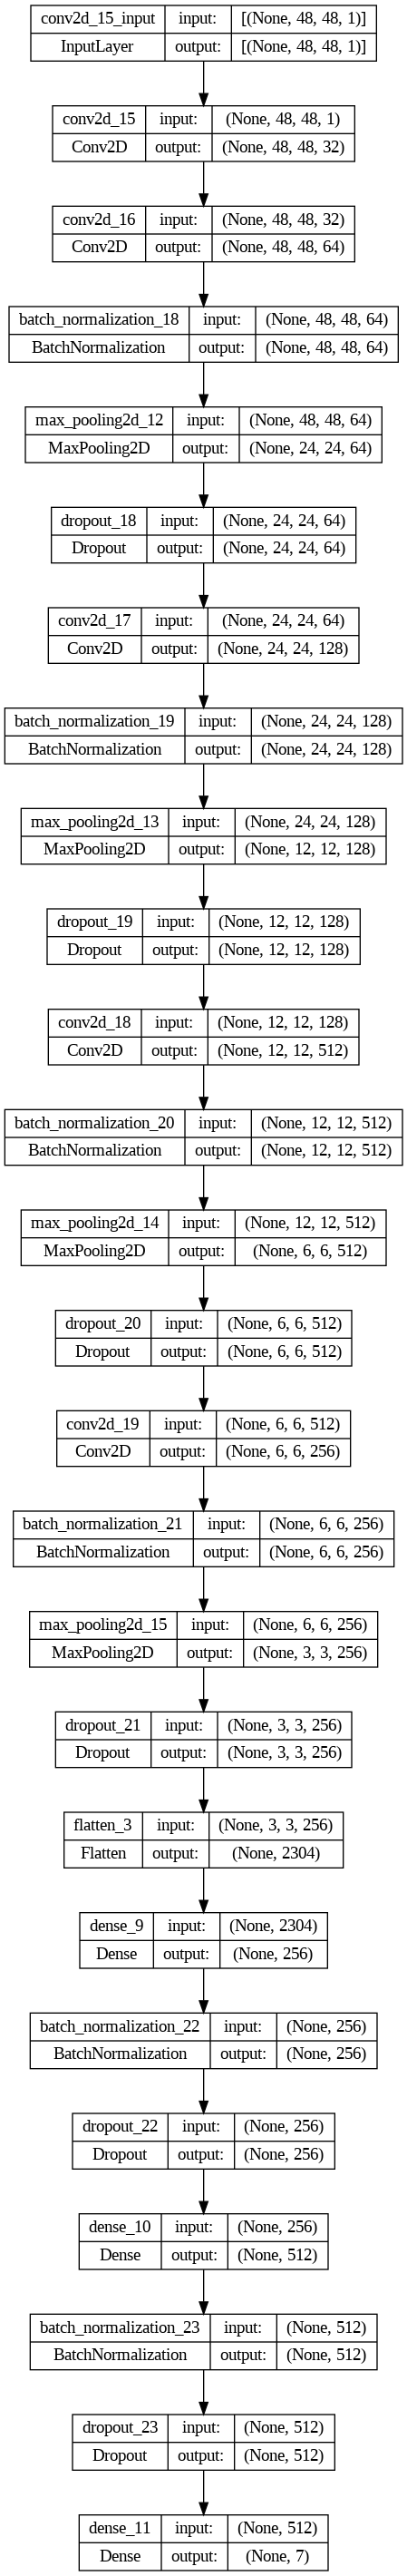

In [ ]:
# Visualize the model.
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Now lets fit the data to our model.
history = model.fit_generator(generator = train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              validation_data = val_set,
                              validation_steps=val_set.n//val_set.batch_size,
                              epochs = 100)

print('Your model has been trained!!')

Epoch 1/100
448/448 [==============================] - 26s 45ms/step - loss: 2.0409 - accuracy: 0.2444 - val_loss: 1.8395 - val_accuracy: 0.2440
Epoch 2/100
448/448 [==============================] - 23s 50ms/step - loss: 1.6119 - accuracy: 0.3794 - val_loss: 1.9071 - val_accuracy: 0.3446
Epoch 3/100
448/448 [==============================] - 22s 50ms/step - loss: 1.3436 - accuracy: 0.4875 - val_loss: 1.5124 - val_accuracy: 0.4176
Epoch 4/100
448/448 [==============================] - 20s 44ms/step - loss: 1.2185 - accuracy: 0.5344 - val_loss: 1.1783 - val_accuracy: 0.5519
Epoch 5/100
448/448 [==============================] - 22s 50ms/step - loss: 1.1454 - accuracy: 0.5634 - val_loss: 1.1574 - val_accuracy: 0.5688
Epoch 6/100
448/448 [==============================] - 19s 43ms/step - loss: 1.0823 - accuracy: 0.5918 - val_loss: 1.1223 - val_accuracy: 0.5746
Epoch 7/100
448/448 [==============================] - 20s 46ms/step - loss: 1.0292 - accuracy: 0.6120 - val_loss: 1.1732 - val_ac

# **Model evaluation:**

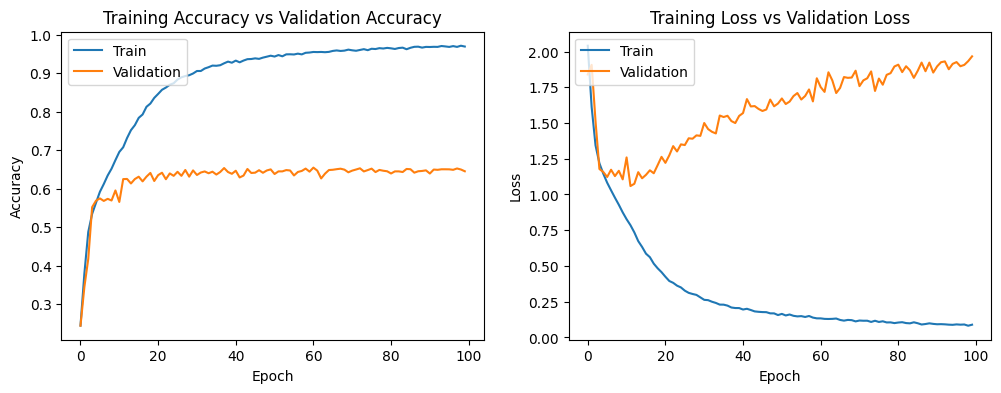

In [ ]:
# Create plots for accuracy and loss.
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

<Figure size 640x480 with 0 Axes>

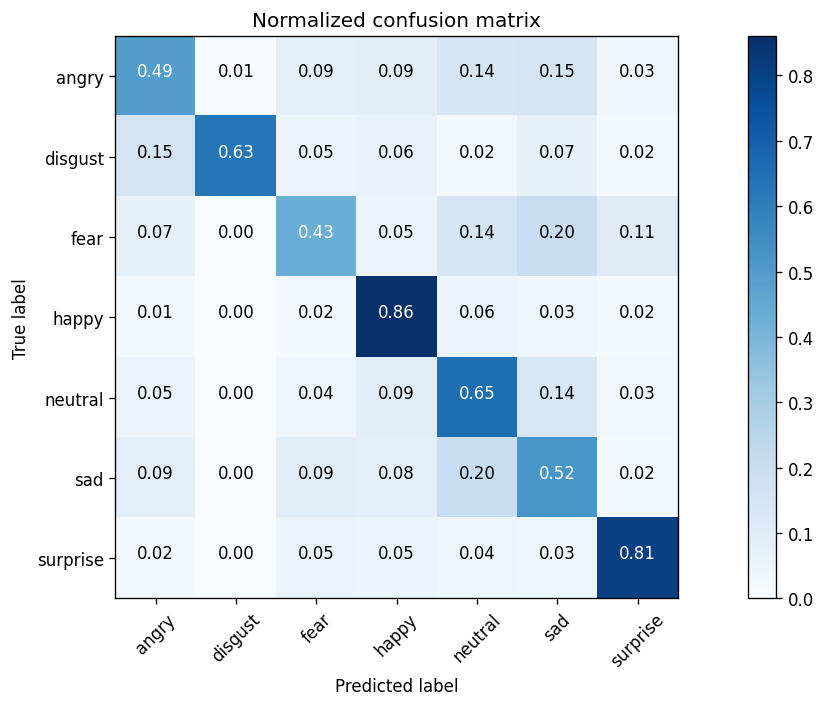

In [ ]:
# Create confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=val_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_set.classes
class_names = val_set.class_indices.keys()

# Create function to plot confussion matrix.
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

# **Test the model:**

(48, 48)


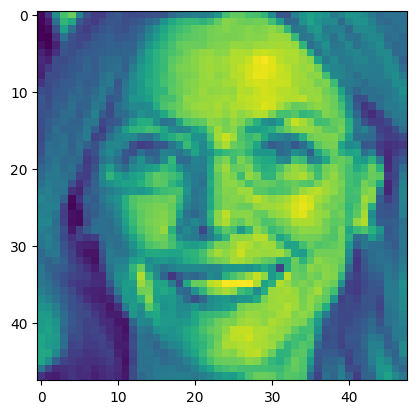

In [ ]:
# First test with  image
img = image.load_img("/content/train/happy/Training_1018317.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [ ]:
# Define each number with a string to get better visibility of the emotion
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [ ]:
# Makes image shape (1,48,48)
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
# Predict the emotion
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 173ms/step
[0.0, 0.0, 4.7222255e-08, 1.0, 0.0, 0.0, 2.4657771e-09]


In [ ]:
# Print out the emotion as a string
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


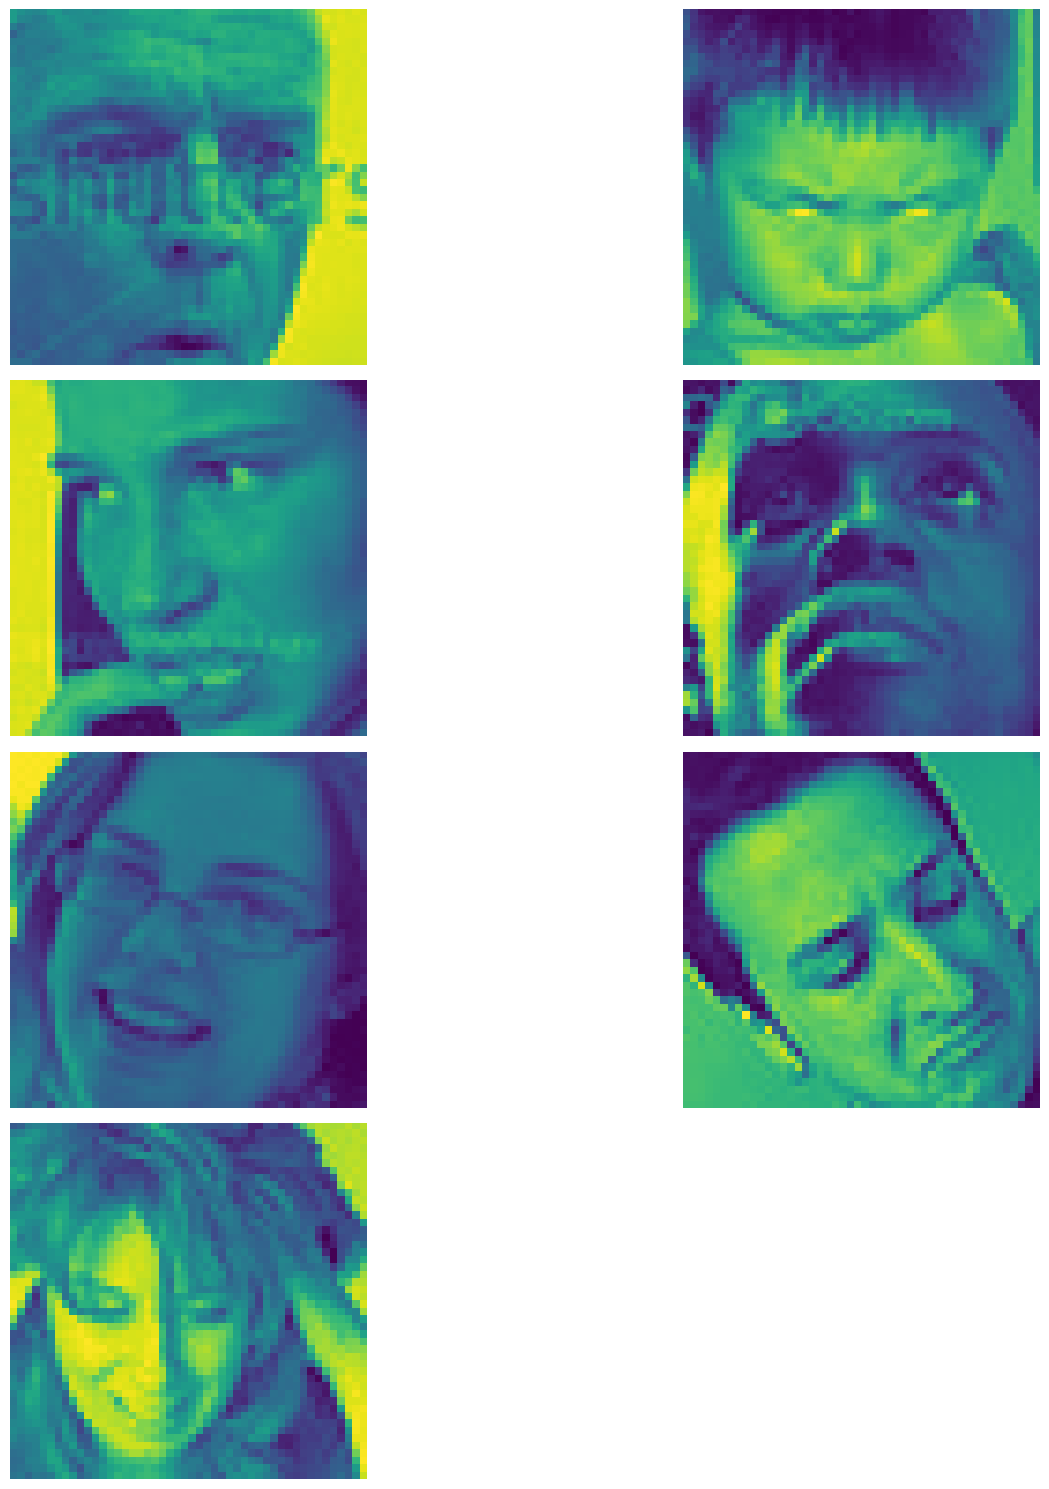

In [ ]:
# Directory containing the images for the second test
directory = "/content/Results"
image_paths = os.listdir(directory)

# Number of images to display in a row
num_images_per_row = 2

# Target size and color mode
target_size = (48, 48)
color_mode = "grayscale"

# Create a new figure
plt.figure(figsize=(15, 15))

# Load and display each image
for i, path in enumerate(image_paths):
    img_path = os.path.join(directory, path)
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)
    img = np.array(img)

    # Add subplot
    plt.subplot(len(image_paths) // num_images_per_row + 1, num_images_per_row, i + 1)

    # Plot the image
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# List to store the predictions
all_predictions = []

# Target size and color mode
target_size = (48, 48)
color_mode = "grayscale"

# Loop through each image
for path in image_paths:
    img_path = os.path.join(directory, path)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = img.reshape(1, 48, 48, 1)

    # Predict using the model
    result = model.predict(img)

    # Append the prediction to the list
    all_predictions.append(result)

# Convert the list of predictions to a numpy array
all_predictions = np.array(all_predictions)

# Print the predictions
print(all_predictions)

1/1 [==============================] - 0s 17ms/step
[[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00]]

 [[1.00e+00 0.00e+00 2.33e-13 0.00e+00 2.10e-15 0.00e+00 5.99e-08]]

 [[2.88e-36 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 7.24e-17]]

 [[0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]]

 [[0.00e+00 0.00e+00 1.00e+00 6.12e-14 1.70e-36 0.00e+00 4.15e-19]]

 [[0.00e+00 1.00e+00 3.95e-13 0.00e+00 0.00e+00 0.00e+00 1.08e-29]]

 [[2.32e-32 0.00e+00 1.00e+00 0.00e+00 1.92e-38 3.62e-13 1.26e-10]]]


In [ ]:
# Convert the list of predictions to a numpy array
all_predictions = np.array(all_predictions)

# Print out predictions alongside corresponding image labels
for i, prediction in enumerate(all_predictions):
    img_index = np.argmax(prediction)
    predicted_label = label_dict[img_index]
    print(f"Image: {image_paths[i]}, Predicted Label: {predicted_label}")

Image: surprise.jpg, Predicted Label: Surprise
Image: angry.jpg, Predicted Label: Angry
Image: fear.jpg, Predicted Label: Fear
Image: neutral.jpg, Predicted Label: Fear
Image: happy.jpg, Predicted Label: Fear
Image: disgust.jpg, Predicted Label: Disgust
Image: sad.jpg, Predicted Label: Fear


In [ ]:
# Save the model
model.save('model_78.h5')

In [ ]:
# Save model weights
model.save_weights('model_weights_78.h5')

# **Build MobileNetV2 Model:**

**We will use the same terms & parameters as in the CNN Model**

In [ ]:
# Define input shape
input_shape = (48, 48, 1)  # MobileNetV2 expects 3 color channels, will adjust below

# Load MobileNetV2
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Since MobileNetV2 requires three channels and we are working with grayscale images,
# we need to repeat the channel dimension to turn your 1 channel image into a 3 channel image.
# This layer will be added to the sequential model.
class RepeatChannels(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.repeat(inputs, repeats=3, axis=-1)

# Create the model
model = Sequential([
    # Adjusting the input shape to have 3 channels
    tf.keras.layers.InputLayer(input_shape=input_shape),
    RepeatChannels(),  # Custom layer to repeat the grayscale channel
    base_model,  # MobileNetV2 base

    # Classifier
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.30),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.30),
    Dense(7, activation='softmax')  # Assuming you have 7 classes
])

# Freeze the layers of MobileNetV2 to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



print('MobileNetV2 model has been created, you can proceed to train your data with this model.')

MobileNetV2 model has been created, you can proceed to train your data with this model.


In [ ]:
# Get model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 repeat_channels (RepeatCha  (None, 48, 48, 3)         0         
 nnels)                                                          
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 256)               1310976   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                        

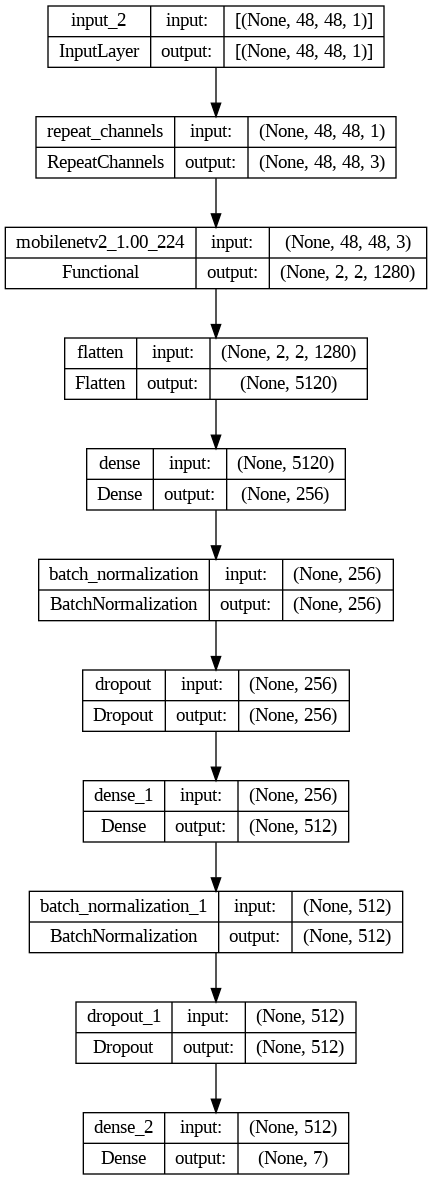

In [ ]:
# Visualize the model.
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Now lets fit the data to our model.
history = model.fit_generator(generator = train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              validation_data = val_set,
                              validation_steps=val_set.n//val_set.batch_size,
                              epochs = 100)

print('Your model has been trained!!')

Epoch 1/100
448/448 [==============================] - 29s 44ms/step - loss: 1.9283 - accuracy: 0.3041 - val_loss: 1.6209 - val_accuracy: 0.3680
Epoch 2/100
448/448 [==============================] - 15s 32ms/step - loss: 1.6312 - accuracy: 0.3699 - val_loss: 1.5680 - val_accuracy: 0.3881
Epoch 3/100
448/448 [==============================] - 16s 37ms/step - loss: 1.5513 - accuracy: 0.3995 - val_loss: 1.5717 - val_accuracy: 0.3965
Epoch 4/100
448/448 [==============================] - 15s 33ms/step - loss: 1.5040 - accuracy: 0.4190 - val_loss: 1.5345 - val_accuracy: 0.4040
Epoch 5/100
448/448 [==============================] - 15s 34ms/step - loss: 1.4610 - accuracy: 0.4332 - val_loss: 1.5384 - val_accuracy: 0.4019
Epoch 6/100
448/448 [==============================] - 15s 34ms/step - loss: 1.4248 - accuracy: 0.4516 - val_loss: 1.5257 - val_accuracy: 0.4099
Epoch 7/100
448/448 [==============================] - 14s 32ms/step - loss: 1.3966 - accuracy: 0.4653 - val_loss: 1.5551 - val_ac

# **Model evaluation:**

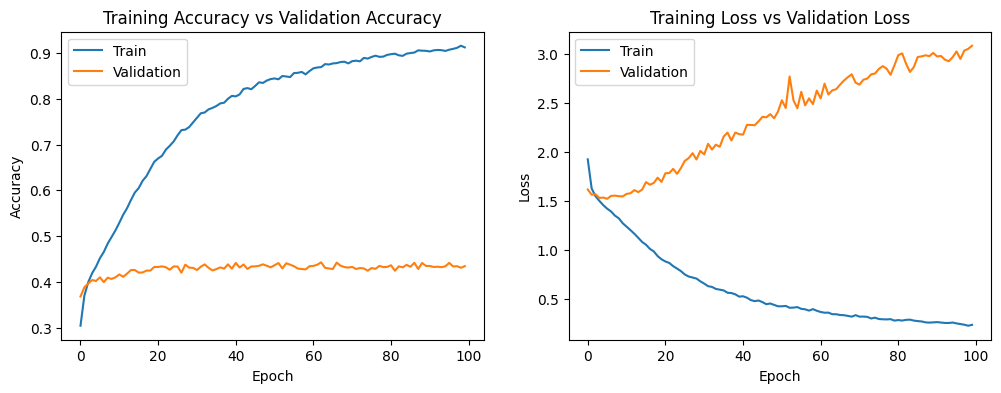

In [ ]:
# Create plots for accuracy and loss.
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

<Figure size 640x480 with 0 Axes>

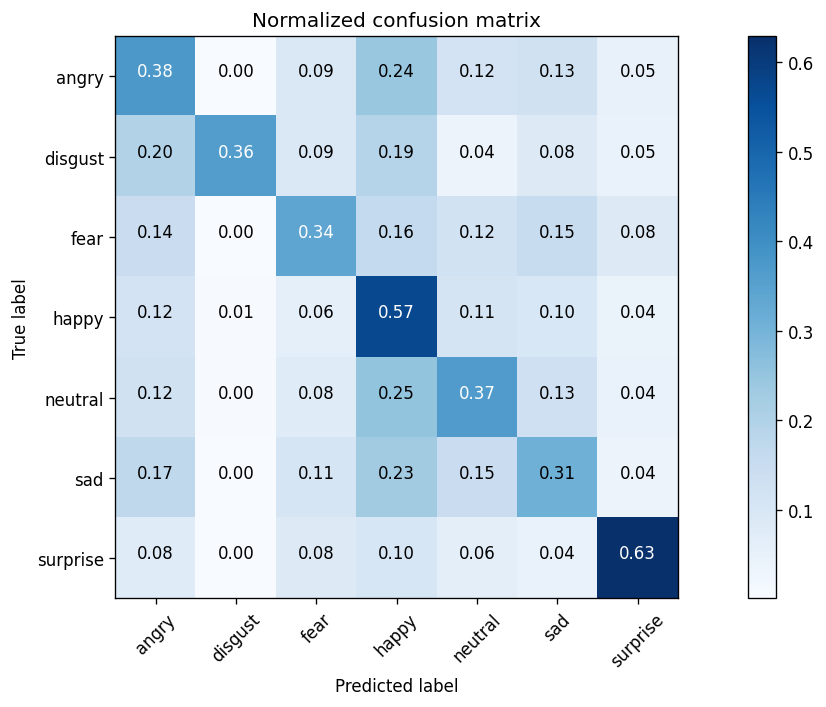

In [ ]:
# Create confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=val_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_set.classes
class_names = val_set.class_indices.keys()

# Create function to plot confussion matrix.
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

# **Test the model:**

(48, 48)


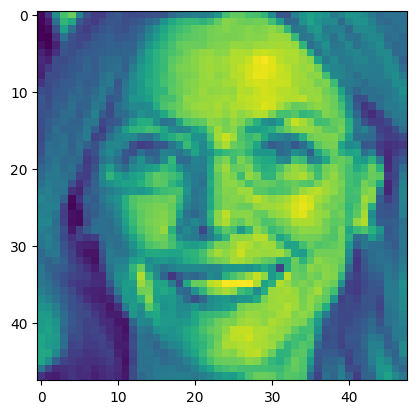

In [ ]:
# First test with  image
img = image.load_img("/content/train/happy/Training_1018317.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [ ]:
# Define each number with a string to get better visibility of the emotion
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [ ]:
# Makes image shape (1,48,48)
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
# Predict the emotion
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 1s 1s/step
[0.4413439, 1.5857006e-06, 0.5586494, 5.0396197e-06, 4.411228e-13, 1.8532605e-13, 2.9426441e-21]


In [ ]:
# Print out the emotion as a string
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Fear


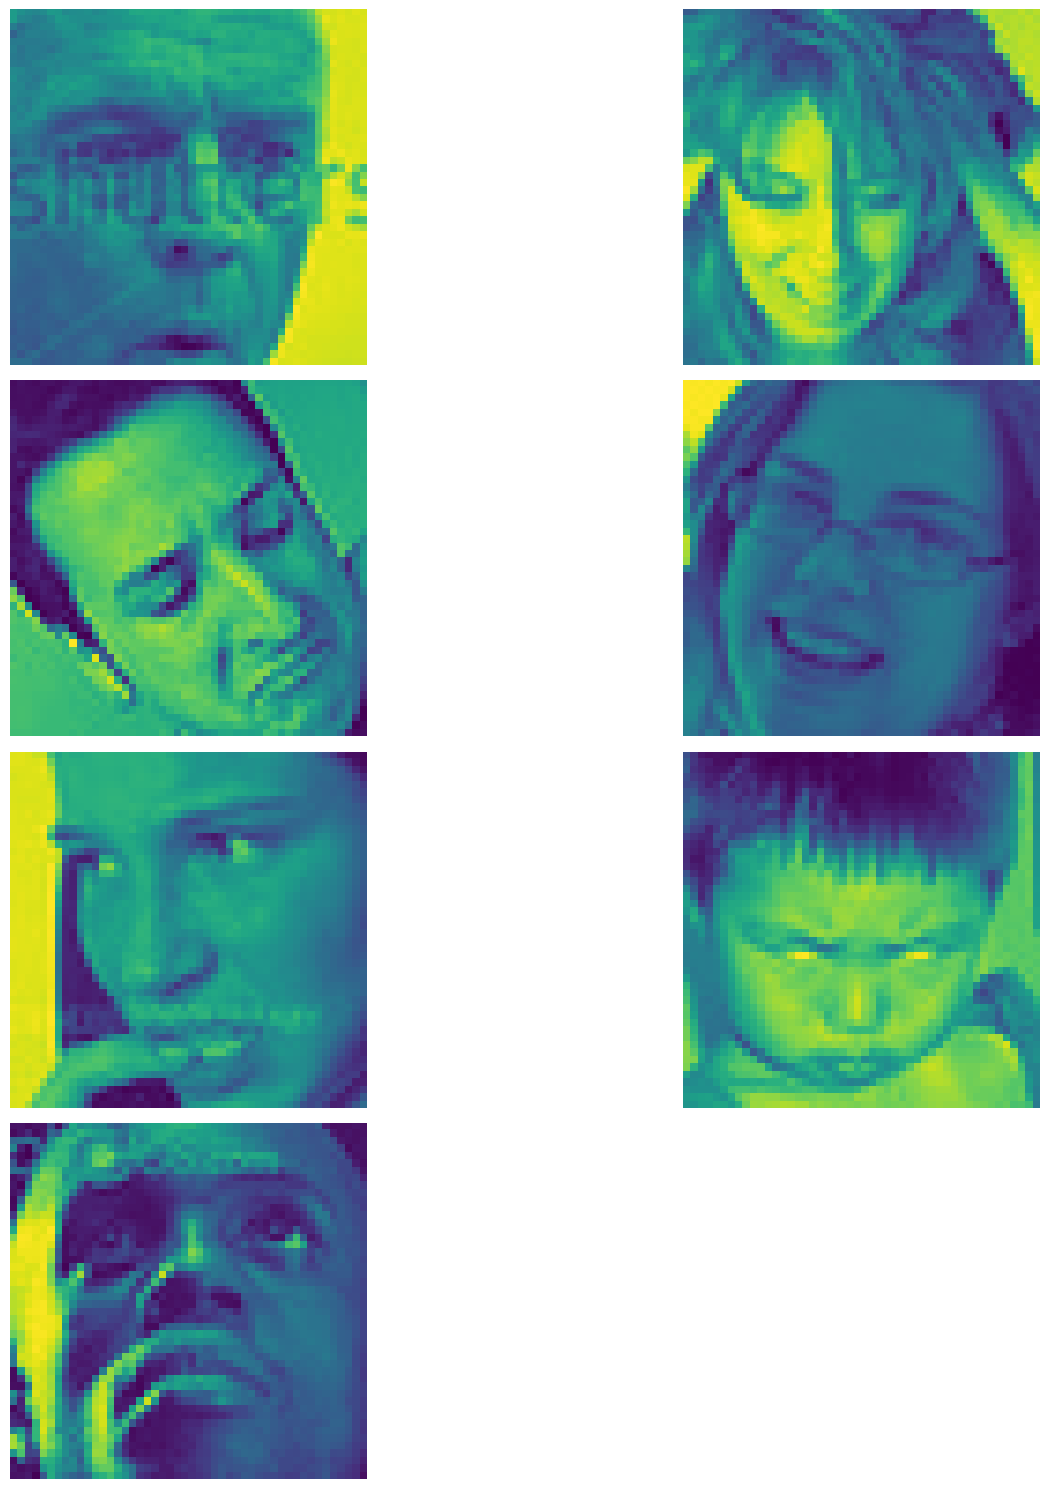

In [ ]:
# Directory containing the images for the second test
directory = "/content/Results"
image_paths = os.listdir(directory)

# Number of images to display in a row
num_images_per_row = 2

# Target size and color mode
target_size = (48, 48)
color_mode = "grayscale"

# Create a new figure
plt.figure(figsize=(15, 15))

# Load and display each image
for i, path in enumerate(image_paths):
    img_path = os.path.join(directory, path)
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)
    img = np.array(img)

    # Add subplot
    plt.subplot(len(image_paths) // num_images_per_row + 1, num_images_per_row, i + 1)

    # Plot the image
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# List to store the predictions
all_predictions = []

# Target size and color mode
target_size = (48, 48)
color_mode = "grayscale"

# Loop through each image
for path in image_paths:
    img_path = os.path.join(directory, path)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = img.reshape(1, 48, 48, 1)

    # Predict using the model
    result = model.predict(img)

    # Append the prediction to the list
    all_predictions.append(result)

# Convert the list of predictions to a numpy array
all_predictions = np.array(all_predictions)

# Print the predictions
print(all_predictions)

1/1 [==============================] - 0s 33ms/step
[[[3.11e-09 2.02e-12 1.00e+00 8.65e-11 2.07e-11 2.96e-04 1.92e-18]]

 [[1.29e-09 1.11e-07 1.00e+00 4.09e-15 3.44e-08 2.94e-05 1.94e-20]]

 [[5.34e-12 1.55e-15 3.56e-01 6.44e-01 9.68e-06 4.67e-10 5.18e-15]]

 [[4.41e-05 9.19e-08 9.99e-01 1.26e-09 3.04e-09 1.09e-03 7.90e-24]]

 [[6.94e-07 3.60e-07 9.36e-01 1.91e-02 1.15e-07 4.53e-02 6.11e-07]]

 [[1.54e-08 3.26e-05 9.99e-01 1.71e-13 2.75e-12 9.79e-04 3.53e-18]]

 [[1.67e-05 3.44e-04 2.05e-02 9.62e-01 1.76e-02 9.29e-08 1.50e-18]]]


In [ ]:
# Convert the list of predictions to a numpy array
all_predictions = np.array(all_predictions)

# Print out predictions alongside corresponding image labels
for i, prediction in enumerate(all_predictions):
    img_index = np.argmax(prediction)
    predicted_label = label_dict[img_index]
    print(f"Image: {image_paths[i]}, Predicted Label: {predicted_label}")

Image: surprise.jpg, Predicted Label: Fear
Image: sad.jpg, Predicted Label: Fear
Image: disgust.jpg, Predicted Label: Happy
Image: happy.jpg, Predicted Label: Fear
Image: fear.jpg, Predicted Label: Fear
Image: angry.jpg, Predicted Label: Fear
Image: neutral.jpg, Predicted Label: Happy


In [ ]:
# Save the model
model.save('model_78.h5')

In [ ]:
# Save model weights
model.save_weights('model_weights_78.h5')

# **Conclusions:**

* **Using the dataset from kaggle we were able to build a CNN and a MobileNetV2 model which is capable of recognizing the facial emotion of a user.**

* **The first model obtained 96% accuracy on training set and 64% accuracy on validation set.**

* **The second model obtained 92% accuracy on training set and 42% accuracy on validation set.**

* **From the confussion matrix we saw that the first model does a good job in predicting most of the classes but the performance is comparatively lower in classes angry and fear. This might be caused due to fewer amount of data present for these classes.**

* **From the confussion matrix we saw that the second model may predict happiness and surprise correctmy, but strugges to predict other emotions, this could to the usage of different input shapes in MobileNetV2 and it's necessaty to train on more Data than CNN.**

* **Finally we tested both models using an image followed by an array of images, the CNN model predicted 5/8 pictures corrrectly which is not bad, getting results 62.5% correctly while the MobileNetV2 model predicted only 1/8 pictures, getting only 12.5% correctly.**